In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob
import gseapy as gp
from gprofiler import GProfiler
from goatools import obo_parser
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
#Africa
africa = pd.read_csv('../data/rawcounts_africa.csv').drop(columns=['Name', 'Description'])
africa = africa.T
africa['region'] = 'Africa'

#America
america = pd.read_csv('../data/rawcounts_america.csv').drop(columns=['Name', 'Description'])
america = america.T
america['region'] = 'America'

#Central Asia
centralasia = pd.read_csv('../data/rawcounts_centralasia.csv').drop(columns=['Name', 'Description'])
centralasia = centralasia.T
centralasia['region'] = 'CentralAsia'

#East Asia
eastasia = pd.read_csv('../data/rawcounts_eastasia.csv').drop(columns=['Name', 'Description'])
eastasia = eastasia.T
eastasia['region'] = 'EastAsia'

#SouthAsia
southasia = pd.read_csv('../data/rawcounts_southasia.csv').drop(columns=['Name', 'Description'])
southasia = southasia.T
southasia['region'] = 'SouthAsia'

#Gene anotation
genes = pd.read_csv('../data/rawcounts_africa.csv')
genes = genes.iloc[:,1:2]

In [14]:
## Merging raw counts
regions = pd.concat([africa,america,centralasia, eastasia,southasia])
#regions = regions.set_index('region')
expr_df = regions
anotation = regions['region']
expr_df = expr_df.drop(columns =['region'])
counts = expr_df.T
counts

,GSM1312724.Mbuti.rnaseqccounts,GSM1312719.Mbuti.rnaseqccounts,GSM1312732.Mozabite.rnaseqccounts,GSM1312722.Mbuti.rnaseqccounts,GSM1312731.Mozabite.rnaseqccounts,GSM1312730.Mozabite.rnaseqccounts,GSM1312725.Mbuti.rnaseqccounts,GSM1312729.Mozabite.rnaseqccounts,GSM1312728.Mozabite.rnaseqccounts,GSM1312723.Mbuti.rnaseqccounts,...,GSM1312708.Cambodian.rnaseqccounts,GSM1312707.Cambodian.rnaseqccounts,GSM1312711.Cambodian.rnaseqccounts,GSM1312737.Pathan.rnaseqccounts,GSM1312738.Pathan.rnaseqccounts,GSM1312734.Pathan.rnaseqccounts,GSM1312733.Pathan.rnaseqccounts,GSM1312736.Pathan.rnaseqccounts,GSM1312739.Pathan.rnaseqccounts,GSM1312735.Pathan.rnaseqccounts
0,0,2,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,63,17,12,7,11,6,42,10,70,...,17,5,9,30,2,10,12,0,14,44
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


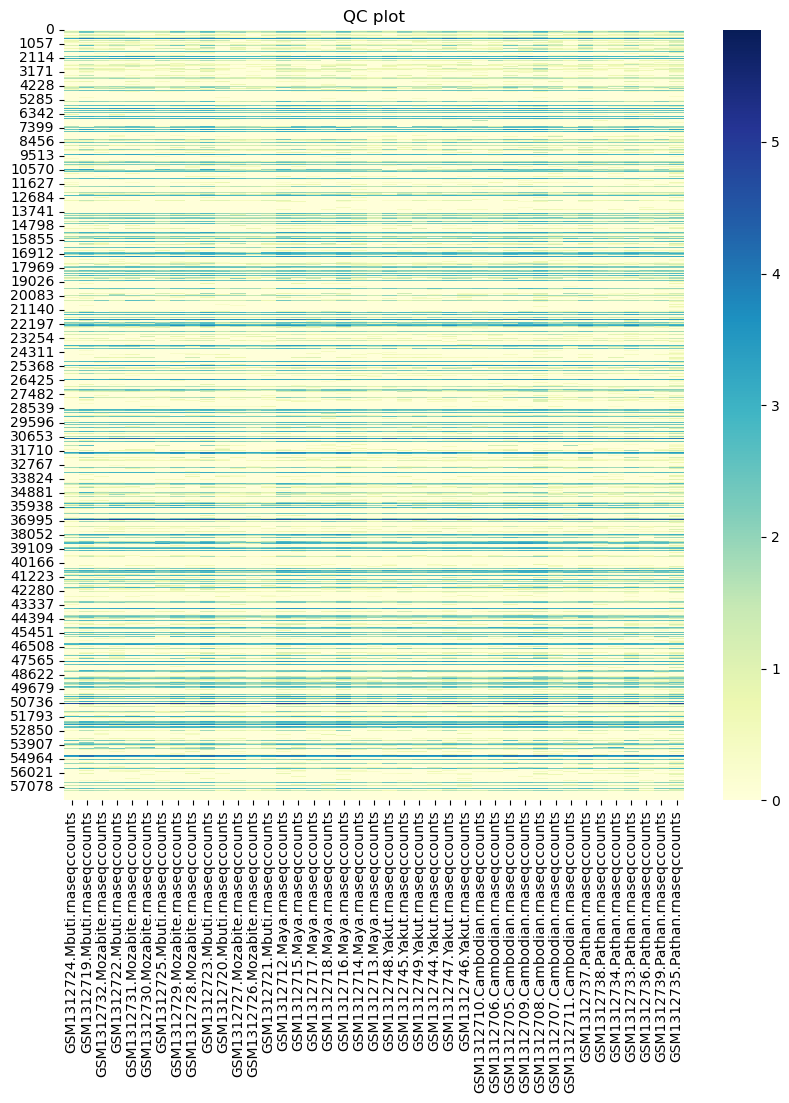

In [16]:
# Perform quality control
# (optional but recommended)
plt.figure(figsize=(10,10))
sns.heatmap(np.log10(1 + counts.iloc[:,0:41]), cmap="YlGnBu", cbar=True)
plt.title("QC plot")
plt.show()

In [19]:
# Filter low-abundance genes
keep = (counts.sum(axis=1) >= 10)
counts_filtered = counts.loc[keep,]

# Normalize counts
# (select one of the following methods)
counts_norm = np.log2(counts_filtered + 1) # log2 normalization
counts_norm = counts_filtered.divide(counts_filtered.sum(axis=0), axis=1) * 1e6 # TPM normalization

# Perform differential gene expression analysis
# (select one of the following methods)


metadata = pd.read_table("metadata.txt", index_col=0)
groups = metadata["condition"].unique().tolist()
conditions = metadata["condition"].tolist()

# PCA plot
counts_norm_T = counts_norm.T
counts_norm_T.index.name = "sample_id"
pca = PCA(n_components=2)
pca_result = pca.fit_transform(StandardScaler().fit_transform(counts_norm_T))
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=counts_norm_T.index)
df_pca["condition"] = [conditions[i] for i in range(len(conditions))]
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1", y="PC2", hue="condition", data=df_pca)
plt.title("PCA plot")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'metadata.txt'

In [18]:
pip install -U scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-macosx_12_0_arm64.whl (8.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Differential expression analysis
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, Formula
pandas2ri.activate()
from rpy2.robjects.packages import importr
deseq = importr('DESeq2')

PackageNotInstalledError: The R package "DESeq2" is not installed.

In [22]:
pip install rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 7.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for rpy2: filename=rpy2-3.5.11-cp310-cp310-macosx_11_0_arm64.whl size=251824 sha256=8b16d74ed9b5b0a434c62462a97095f1f487bab74ccb7f25ada571902ef5611d
  Stored in directory: /Users/luciabazan/Library/Caches/pip/wheels/17/7d/bd/8664bfbd5dad19bce421dbbea070d81552fd39df695081edd8
Successfully built rpy2
Note: you may need to restart the kernel to use updated packages.
